# P4 Examen
- **Name**: Elias De Hondt
- **Class**: ISB204B
- **Course**: Data Science 2
- **Date**: 11/06/2024
- **StudentID**: 0160712-80

> You hand in a **completed notebook**, so the **results of the calculations are also included**. Results should **not** be rounded.

In [11]:
# Import statements:
from termcolor import colored # type: ignore                                          # Colored text
from random import Random  # type: ignore                                             # Random number generator
import math  # type: ignore                                                           # Mathematical functions
import pandas as pd  # type: ignore                                                   # Data manipulation
import numpy as np  # type: ignore                                                    # Scientific computing
import matplotlib.pyplot as plt  # type: ignore                                       # Data visualization
from scipy.stats import binom as binomial  # type: ignore                             # Binomial distribution
from scipy.stats import norm as normal  # type: ignore                                # Normal distribution
from scipy.stats import poisson as poisson  # type: ignore                            # Poisson distribution
from scipy.stats import t as student  # type: ignore                                  # Student distribution
from scipy.stats import chi2  # type: ignore                                          # Chi-squared distribution
from scipy.stats import ttest_1samp  # type: ignore                                   # One-sample t-test
from scipy.stats import chisquare  # type: ignore                                     # Chi-squared test
from scipy.special import comb  # type: ignore                                        # Combinations
from mlxtend.frequent_patterns import apriori  # type: ignore                         # Apriori algorithm
from mlxtend.frequent_patterns import fpgrowth  # type: ignore                        # FP-growth algorithm
from mlxtend.frequent_patterns import association_rules  # type: ignore               # Association rules
from mlxtend.preprocessing import TransactionEncoder  # type: ignore                  # Transaction encoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  # type: ignore  # Discriminant Analysis
from tensorflow import keras  # type: ignore                                          # Deep Learning library
from tensorflow.keras import Model  # type: ignore                                    # Model class
from tensorflow.keras.layers import Input, Dense, BatchNormalization  # type: ignore  # Layers
from tensorflow.keras.utils import to_categorical  # type: ignore                     # One-hot encoding
from tensorflow.keras.optimizers import Adam  # type: ignore                          # Optimizer
from livelossplot import PlotLossesKeras  # type: ignore                              # Live plot
from keras.src.optimizers import RMSprop  # type: ignore                              # Optimizer
from sklearn.model_selection import train_test_split  # type: ignore                  # Train-test split
from sklearn.metrics import roc_auc_score # type: ignore                              # ROC AUC score
from simanneal import Annealer  # type: ignore                                        # Simulated Annealing
from inspyred import ec  # type: ignore                                               # Evolutionary Computation
import warnings  # type: ignore                                                       # Disable warnings
warnings.filterwarnings("ignore")                                                     # Disable warnings
outputColor = "blue"                                                                  # Color for the output

In [14]:
# Function definitions:
def LDA_coefficients(x, lda):
    """
    Computes the Linear Discriminant Analysis (LDA) coefficients for each class.
    This function transforms the input data using LDA and calculates the coefficients for the discriminant functions.

    Parameters:
    - X (pd.DataFrame): Input features for LDA.
    - lda (object): Trained LDA model.

    Returns:
    - pd.DataFrame: A dataframe containing the LDA coefficients for each class.

    Usage:
    coefficients = LDA_coefficients(X, lda_model)
    """
    nb_col = x.shape[1]
    matrix = np.zeros((nb_col + 1, nb_col), dtype=int)
    Z = pd.DataFrame(data=matrix, columns=x.columns)
    for j in range(nb_col):
        Z.iloc[j, j] = 1
    LD = lda.transform(Z)
    resultaat = pd.DataFrame()
    index = ['const'] + list(x.columns)

    for i in range(LD.shape[1]):
        coef = [LD[-1, i]] + list(LD[:-1, i] - LD[-1, i])
        result = pd.Series(coef, index=index)
        column_name = f'LD{i + 1}'
        resultaat[column_name] = result

    return resultaat


def trueFalsef(matrix, columnnb=0):
    """
    Calculates and prints the True Positive (TP), True Negative (TN), False Positive (FP),
    and False Negative (FN) rates from a confusion matrix.

    Parameters:
    - confusion_matrix (pd.DataFrame): Confusion matrix for the classification.
    - columnnb (int): Index of the class for which to compute the metrics (default is 0).

    Returns:
    - None: This function prints the metrics directly.

    Usage:
    trueFalsef(confusion_matrix, columnnb=0)
    """

    TP = matrix.values[columnnb][columnnb]
    print(colored(f'TP: {TP}', 'blue'))
    TN = np.diag(matrix).sum() - TP
    print(colored(f'TN: {TN}', 'blue'))
    FP = matrix.values[:, columnnb].sum() - TP
    print(colored(f'FP: {FP}', 'blue'))
    FN = matrix.values[columnnb, :].sum() - TP
    print(colored(f'FN: {FN}', 'blue'))
    return


def calculate_confusion_metrics(matrix, class_label):
    """
    Calculates the True Positive (TP), True Negative (TN), False Positive (FP), and False Negative (FN) rates
    for a specific class from a confusion matrix.

    Parameters:
    - confusion_matrix (pd.DataFrame): Confusion matrix for the classification.
    - class_label (str): The label of the class for which to compute the metrics.

    Returns:
    - tuple: A tuple containing the TP, TN, FP, and FN rates for the specified class.

    Usage:
    TP, TN, FP, FN = calculate_confusion_metrics(matrix, 'class1')
    """
    class_index = matrix.columns.get_loc(class_label)
    TP = matrix.iloc[class_index, class_index]
    FP = matrix.iloc[:, class_index].sum() - TP
    FN = matrix.iloc[class_index, :].sum() - TP
    total_sum = matrix.values.sum()
    TN = total_sum - (TP + FP + FN)

    return TP, TN, FP, FN


def accuracyf(matrix):
    """
    Calculates the overall accuracy from a confusion matrix.

    Parameters:
    - confusion_matrix (pd.DataFrame): Confusion matrix for the classification.

    Returns:
    - float: The accuracy of the classification.

    Usage:
    accuracy = accuracyf(matrix)
    """
    return np.diag(matrix).sum() / matrix.sum().sum()


def precisionf(matrix):
    """
    Calculates the precision for each class from a confusion matrix.

    Parameters:
    - confusion_matrix (pd.DataFrame): Confusion matrix for the classification.

    Returns:
    - list: A list of precision values for each class.

    Usage:
    precision = precisionf(matrix)
    """
    results = []
    n = matrix.shape[1]
    for i in range(0, n):
        TP = matrix.values[i][i]
        results = results + [TP / matrix.values[:, i].sum()]
    return results


def recallf(matrix):
    """
    Calculates the recall for each class from a confusion matrix.

    Parameters:
    - confusion_matrix (pd.DataFrame): Confusion matrix for the classification.

    Returns:
    - list: A list of recall values for each class.

    Usage:
    recall = recallf(matrix)
    """
    results = []
    n = matrix.shape[0]
    for i in range(0, n):
        TP = matrix.values[i][i]
        results = results + [TP / matrix.values[i, :].sum()]
    return results


def f_measuref(matrix, beta):
    """
    Calculates the F-measure (F1 score) for each class from a confusion matrix using a specified beta value.

    Parameters:
    - confusion_matrix (pd.DataFrame): Confusion matrix for the classification.
    - beta (float): The beta value to weigh precision and recall (default is 1, which gives the F1 score).

    Returns:
    - list: A list of F-measure values for each class.

    Usage:
    f_measure = f_measuref(matrix, beta=1)
    """
    precisionarray = precisionf(matrix)
    recallarray = recallf(matrix)
    fmeasure = []
    n = len(precisionarray)
    for i in range(0, n):
        p = precisionarray[i]
        r = recallarray[i]
        fmeasure = fmeasure + [((beta * beta + 1) * p * r) / (beta * beta * p + r)]
    return fmeasure


def overview_metrieken(matrix, beta):
    """
    Provides an overview of classification metrics (precision, recall, F-measure) for each class in a confusion matrix.

    Parameters:
    - confusion_matrix (pd.DataFrame): Confusion matrix for the classification.
    - beta (float): The beta value to weigh precision and recall for the F-measure (default is 1).

    Returns:
    - list: A list containing a dataframe with precision, recall, and F-measure for each class.

    Usage:
    metrics_overview = overview_metrieken(matrix, beta=1)
    """
    overview_1 = np.transpose(precisionf(matrix))
    overview_2 = np.transpose(recallf(matrix))
    overview_3 = np.transpose(f_measuref(matrix, beta))
    overview_table = pd.DataFrame(data=np.array([overview_1, overview_2, overview_3]), columns=matrix.index)
    overview_table.index = ['precision', 'recall', 'fx']
    return [overview_table]


def positiveratesf(matrix):
    """
    Calculates and prints the True Positive Rate (TPR) and False Positive Rate (FPR) for a
    binary classification confusion matrix.

    Parameters:
    - confusion_matrix (pd.DataFrame): Confusion matrix for binary classification.

    Returns:
    - None: This function prints the TPR and FPR directly.

    Usage:
    positiveratesf(matrix)
    """
    if (matrix.shape[0] == 2) & (matrix.shape[1] == 2):
        TPR = matrix.values[0][0] / matrix.values[0, :].sum()
        print(colored(f"TPR: {TPR}", "blue"))
        FPR = matrix.values[1][0] / matrix.values[1, :].sum()
        print(colored(f"FPR: {FPR}", "blue"))
    return


def plot_rocf(y_true, y_score, title='ROC Curve', **kwargs):
    """
    Plots the Receiver Operating Characteristic (ROC) curve and calculates the Area Under the Curve (AUC) for a set of
    true labels and predicted scores. It also highlights the optimal threshold on the ROC curve.

    Parameters:
    - y_true (array-like): True binary labels.
    - y_score (array-like): Target scores, probability estimates of the positive class.
    - title (str): Title of the ROC curve plot (default is 'ROC Curve').
    - **kwargs (dict): Additional keyword arguments for customizing the plot.

    Returns:
    - None: This function plots the ROC curve directly.

    Usage:
    plot_rocf(y_true, y_score, title='My ROC Curve', pos_label=1, figsize=(8, 8))
    """
    from sklearn.metrics import roc_curve, roc_auc_score

    if 'pos_label' in kwargs:
        fpr, tpr, thresholds = roc_curve(y_true=y_true, y_score=y_score, pos_label=kwargs.get('pos_label'))
        auc = roc_auc_score(y_true, y_score)
    else:
        fpr, tpr, thresholds = roc_curve(y_true=y_true, y_score=y_score)
        auc = roc_auc_score(y_true, y_score)

    optimal_idx = np.argmax(tpr - fpr)
    optimal_threshold = thresholds[optimal_idx]

    figsize = kwargs.get('figsize', (7, 7))
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    ax.grid(linestyle='--')

    ax.plot(fpr, tpr, color='darkorange', label='AUC: {}'.format(auc))
    ax.set_title(title)
    ax.set_xlabel('False Positive Rate (FPR)')
    ax.set_ylabel('True Positive Rate (TPR)')
    ax.fill_between(fpr, tpr, alpha=0.3, color='darkorange', edgecolor='black')

    ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

    ax.scatter(fpr[optimal_idx], tpr[optimal_idx], label='optimal cutoff {:.2f} on ({:.2f},{:.2f})'.format(optimal_threshold, fpr[optimal_idx], tpr[optimal_idx]), color='red')
    ax.plot([fpr[optimal_idx], fpr[optimal_idx]], [0, tpr[optimal_idx]], linestyle='--', color='red')
    ax.plot([0, fpr[optimal_idx]], [tpr[optimal_idx], tpr[optimal_idx]], linestyle='--', color='red')

    ax.legend(loc='lower right')
    plt.show()


def evaluate_classifier(matrix, beta=1, threshold=0.9):
    """
    Evaluates a classifier based on its confusion matrix and specified threshold for various metrics.
    This function checks if the classifier meets the threshold criteria for accuracy, precision, recall, and F1-score.

    Parameters:
    - confusion_matrix (pd.DataFrame): Confusion matrix for the classification.
    - beta (float): The beta value to weigh precision and recall for the F-measure (default is 1).
    - threshold (float): The threshold value to evaluate the metrics (default is 0.9).

    Returns:
    - None: This function prints the evaluation result directly.

    Usage:
    evaluate_classifier(confusion_matrix, beta=1, threshold=0.9)
    """
    TP = np.diag(matrix).sum()
    TN = np.sum(np.diag(matrix)) - TP
    accuracy = (TP + TN) / matrix.sum().sum()

    n = matrix.shape[1]
    precision = [np.diag(matrix)[i] / np.sum(matrix.iloc[i, :]) if np.sum(matrix.iloc[i, :]) > 0 else 0 for i in range(0, n)]

    n = matrix.shape[0]
    recall = [np.diag(matrix)[i] / np.sum(matrix.iloc[:, i]) if np.sum(matrix.iloc[:, i]) > 0 else 0 for i in range(0, n)]

    f1_score = [((beta ** 2 + 1) * p * r) / ((beta ** 2 * p) + r) if (p + r) > 0 else 0 for p, r in zip(precision, recall)]

    if accuracy >= threshold and all(prec >= threshold for prec in precision) and all(rec >= threshold for rec in recall) and all(f1 >= threshold for f1 in f1_score):
        print(colored(f"This is a good classifier with a threshold of {threshold * 100}%", "blue"))
    else:
        print(colored(f"This is a bad classifier with a threshold of {threshold * 100}%", "blue"))


def categorize_variables(df):
    """
    Categorize columns in a DataFrame into potential dependent (categorical)
    and independent (numerical) variables for Discriminant Analysis.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the data to be analyzed.

    Returns:
    tuple: A tuple containing two lists:
        - dependent_vars (list): List of column names suitable as dependent variables (categorical).
        - independent_vars (list): List of column names suitable as independent variables (numerical).
    """
    independentVars = []
    dependentVars = []

    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            independentVars.append(col)
        elif pd.api.types.is_categorical_dtype(df[col]) or pd.api.types.is_object_dtype(df[col]) or pd.api.types.is_bool_dtype(df[col]):
            dependentVars.append(col)

    return independentVars, dependentVars


def find_best_threshold(y_true, y_score, beta=1):
    """
    Finds the optimal threshold for classification by maximizing the F1-score based on the precision-recall curve.

    Parameters:
    - y_true (array-like): True binary labels.
    - y_score (array-like): Target scores, probability estimates of the positive class.
    - beta (float): The beta value to weigh precision and recall for the F-measure (default is 1).

    Returns:
    - float: The optimal threshold that maximizes the F1-score.

    Usage:
    best_threshold = find_best_threshold(y_true, y_score, beta=1)
    """
    from sklearn.metrics import precision_recall_curve

    precision, recall, thresholds = precision_recall_curve(y_true, y_score)
    f1_score = [(beta ** 2 + 1) * p * r / ((beta ** 2 * p) + r) if (p != 0 and r != 0) else 0 for p, r in zip(precision, recall)]
    optimal_idx = f1_score.index(max(f1_score))
    return thresholds[optimal_idx]


def most_important_variable(independentVariables, dependentVariable):
    """
    Finds the most important variable for Linear Discriminant Analysis (LDA) based on the coefficients.
    This function fits an LDA model and returns the variable with the highest absolute coefficient.

    Parameters:
    - independent_vars (pd.DataFrame): Input features for LDA.
    - dependent_var (pd.Series): Target variable for LDA.

    Returns:
    - pd.Series: A series containing the most important variable and its coefficient.

    Usage:
    important_var = most_important_variable(independent_vars, dependent_var)
    """
    lda = LinearDiscriminantAnalysis()
    lda.fit(independentVariables, dependentVariable)
    coef_df = pd.DataFrame({'Variable': independentVariables.columns, 'Coefficient': lda.coef_[0]})

    coef_df['Absolute Coefficient'] = coef_df['Coefficient'].abs()

    return coef_df.loc[coef_df['Absolute Coefficient'].idxmax()]

In [48]:
# Load in data and filter data
CellPhone = pd.read_csv('../Data/CellPhone_train.csv', delimiter=',', decimal='.')

## Questions 1

In [16]:
independentVariables = 8
print(colored(f"Here is the requested solution: {independentVariables - 1}", outputColor))

Here is the requested solution: 7


## Questions 2

In [129]:
# Create linear discriminant analysis model
independentVariables = CellPhone[['battery_power', 'clock_speed', 'fc', 'int_memory', 'n_cores', 'pc', 'ram', 'talk_time']]         # Independent variables
dependentVariable = np.where(CellPhone['price_range'] == 3, 'True', 'False')                                                        # Replace the output & Dependent variable
lda = LinearDiscriminantAnalysis()
lda.fit(independentVariables, dependentVariable)

resultaat = LDA_coefficients(independentVariables, lda)

display(resultaat)

,LD1
const,-3.890118
battery_power,0.000855
clock_speed,-0.015213
fc,-0.010454
int_memory,0.004280
n_cores,-0.001439
pc,0.003935
ram,0.001301
talk_time,-0.003131


## Questions 3

In [138]:
# Create confusion matrix
predicted = pd.Series(lda.predict(independentVariables), name='Predicted')
actual = CellPhone['predicted_price_range'].rename('actual')
confusion_matrix = pd.crosstab(index=actual, columns=predicted, margins='All', margins_name='Total')
display(confusion_matrix)

Predicted,False,True,Total
actual,,,
0,515,0,515
1,489,0,489
2,446,45,491
3,0,505,505
Total,1450,550,2000


In [158]:
# Evaluating model
precision_0 = precisionf(confusion_matrix)[0]
precision_1 = precisionf(confusion_matrix)[1]
precision_2 = precisionf(confusion_matrix)[2]
precision_3 = precisionf(confusion_matrix)[3]

recall_0 = recallf(confusion_matrix)[0]
recall_1 = recallf(confusion_matrix)[1]
recall_2 = recallf(confusion_matrix)[2]
recall_3 = recallf(confusion_matrix)[3]

f1_0 = f_measuref(confusion_matrix, 1)[0]
f1_1 = f_measuref(confusion_matrix, 1)[1]
f1_2 = f_measuref(confusion_matrix, 1)[2]
f1_3 = f_measuref(confusion_matrix, 1)[3]

# Precision: The number of correct positive predictions divided by the total predictions.
print(colored(f"The precision of the classifier for 0 is: {round(precision_0, 2) * 100}%", outputColor))
print(colored(f"The precision of the classifier for 1 is: {round(precision_1, 2) * 100}%", outputColor))
print(colored(f"The precision of the classifier for 2 is: {round(precision_2, 2) * 100}%", outputColor))
print(colored(f"The precision of the classifier for 3 is: {round(precision_3, 2) * 100}%", outputColor))

# Recall: The number of correct positive predictions divided by the number of total positives.
print(colored(f"The recall of the classifier for 0 is: {round(recall_0, 2) * 100}%", outputColor))
print(colored(f"The recall of the classifier for 1 is: {round(recall_1, 2) * 100}%", outputColor))
print(colored(f"The recall of the classifier for 2 is: {round(recall_2, 2) * 100}%", outputColor))
print(colored(f"The recall of the classifier for 3 is: {round(recall_3, 2) * 100}%", outputColor))

# F-measuref: The curved harmonic mean of precision and recall.
print(colored(f"The F1-measure of the classifier for 0 is: {round(f1_0, 2) * 100}%", outputColor))
print(colored(f"The F1-measure of the classifier for 1 is: {round(f1_1, 2) * 100}%", outputColor))
print(colored(f"The F1-measure of the classifier for 2 is: {round(f1_2, 2) * 100}%", outputColor))
print(colored(f"The F1-measure of the classifier for 3 is: {round(f1_3, 2) * 100}%", outputColor))

print(colored(f"Het model is het besten voor classifier 3 (Komt van de F1-measure & confusion_matrix)", outputColor))

The precision of the classifier for 0 is: 18.0%
The precision of the classifier for 1 is: 0.0%
The precision of the classifier for 2 is: 12.0%
Het model is het besten voor classifier 3 (Komt van de F1-measure & confusion_matrix)


## Questions 4

The AUC for CellPhone is: 0.68%
The optimal cutoff for CellPhone is (Dat is het punt dat het beste bij 1 komt 1 = 100% goed voor het model dus altijd juist): 0.2


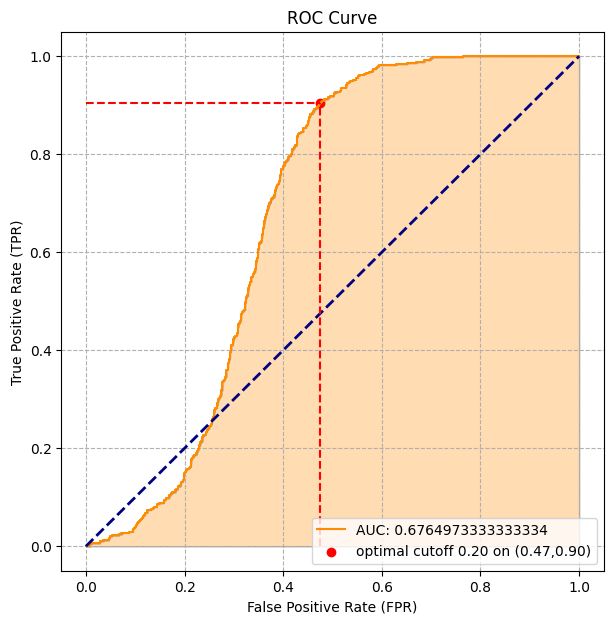

In [107]:
# Plot ROC curve
y_true = CellPhone['price_range'].apply(lambda x: 1 if x == 1 else 0)
y_score = CellPhone['predicted_price_range_proba']

# Calculate AUC (Area Under Curve)
auc = roc_auc_score(y_true, y_score)

# Area Under Curve: If the binary classifier can distinguish the two better, the number is higher.
print(colored(f"The AUC for CellPhone is: {round(auc, 2)}%", outputColor))
print(colored(f"The optimal cutoff for CellPhone is (Dat is het punt dat het beste bij 1 komt 1 = 100% goed voor het model dus altijd juist): {0.20}", outputColor))

plot_rocf(y_true=y_true, y_score=y_score, title='ROC Curve')

## Questions 5

In [159]:
print(colored(f"A: {3}", outputColor))
print(colored(f"B: {2}", outputColor))
print(colored(f"C: {'H1'}", outputColor))
print(colored(f"D: {'Tanh Functie'}", outputColor))

A: 3
B: 2
C: H1
D: Tanh Functie


## Questions 6

In [160]:
# Split up the necessary data 
x_CellPhone = CellPhone[['battery_power', 'clock_speed', 'fc', 'int_memory', 'n_cores', 'pc', 'ram', 'talk_time']]                       # Get the input
y_CellPhone = CellPhone['price_range']                                                                                                   # Get the output

x_CellPhone_normalize = (x_CellPhone - x_CellPhone.min()) / (x_CellPhone.max() - x_CellPhone.min())                                      # Normalize the input
print(colored("BatchNormalization werkt niet op mijn pc. mijn venv is dood :(", outputColor))

# Create (ANN) artificial neural network
inputs_CellPhone = Input(shape=(8,))
x_CellPhone_model = Dense(8, activation='relu')(inputs_CellPhone)
outputs_CellPhone = Dense(1, activation='softmax')(x_CellPhone_model) # 4?
model_CellPhone = Model(inputs_CellPhone, outputs_CellPhone, name='CellPhone_NN')

# Compile the model
model_CellPhone.compile(optimizer=keras.optimizers.Adam(learning_rate=0.10), loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

# Fit the model
history_CellPhone = model_CellPhone.fit(
                                x_CellPhone_normalize,                  # Input
                                y_CellPhone,                            # Output
                                epochs=100,                             # Number of epochs (epochs = iterations over all the dataset)
                                batch_size=32,
                                validation_split=0.2,
                                callbacks=[PlotLossesKeras()],          # Plot the losses
                                verbose=False)                          # Fit the model

accuracy
	training         	 (min:    0.249, max:    0.249, cur:    0.249)
	validation       	 (min:    0.255, max:    0.255, cur:    0.255)
Loss
	training         	 (min:    0.000, max:    0.000, cur:    0.000)
	validation       	 (min:    0.000, max:    0.000, cur:    0.000)


In [94]:
# Get a summary of the model
model_CellPhone.summary()

Model: "CellPhone_NN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_19 (InputLayer)     │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_59 (Dense)                │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_60 (Dense)                │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 245 (984.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 164 (660.00 B)

## Questions 7

In [128]:
x1 = [1.0,0.5]
x2 = [-0.5,-0.5]
x3 = [1.0,1.0]
x4 = [-0.75,-0.75]
x5 = [-0.5,0.0]
x6 = [-0.5,-1.0]
x7 = [0.5,0.5]
x8 = [0.5,0.0]
x9 = [0.75,0.75]
x10 = [-1.2,-1.0]


def energy(x):
    return((0.2 + x[0] * x[0] + x[0] * x[1] - 0.1 * np.cos(1.0 * math.pi * x[0]) - 0.1 * np.cos(-2.0 * np.pi * x[1])))

        

initial_state = [x1, x2, x3, x4, x5, x6, x7, x8, x9, x10]
optimal_solution, optimal_value = energy(initial_state).anneal()

print(colored(f"Optimal solution: {optimal_solution}\nObjective function value: {optimal_value}", outputColor))

TypeError: can't multiply sequence by non-int of type 'list'

## Questions 8

In [72]:
populatie = pd.DataFrame({'chromosoon':range(1,21), 'score_doelfunctie':[247.6251629 , 214.51757898, 249.13309669, 188.81888775,104.80883904, 316.12006777, 198.56246032, 465.06055288,156.80288596, 243.7813792 , 185.9045345 , 146.50208061, 119.45574293, 364.05258658, 416.80157775, 481.66470259, 412.22107183, 421.06760396, 227.18712982, 229.35077602]})
display(populatie)

,chromosoon,score_doelfunctie
0,1,247.625163
1,2,214.517579
2,3,249.133097
3,4,188.818888
4,5,104.808839
5,6,316.120068
6,7,198.562460
7,8,465.060553
8,9,156.802886
9,10,243.781379


## Questions 9

In [73]:
# CEL 1: Startsituatie inlezen (NIETS AANPASSEN)

from simanneal import Annealer
board = pd.read_csv('../Data/sudoku.csv', header=None)

In [74]:
# CEL 2: emptyfields aanmaken (NIETS AANPASSEN)
# Code om de indexen van de lege velden in een list te steken [Niet aanpassen]

board_emptyFields = board == 0
emptyfields = np.where(board_emptyFields.to_numpy().flatten() == True)[0].tolist()  # De indices van de lege velden (velden met nul)

In [75]:
# CEL 3: Simulated annealing klasse
class Sudoku(Annealer):
 def energy(self):
    s = pd.DataFrame(self.state.reshape(9,9))
    lineTotal = 45
    lineSums = pd.concat([s.sum(axis=1), s.sum(axis=0)]) # Telt de som van de inhoud van de rijen en de kolommen 
    valueCounts = pd.Series(np.unique(s, return_counts=True))[1] # Telt hoe vaak elk getal voorkomt in een rij of kolom
    valueCountErrorCost=  np.absolute(valueCounts - 9).sum()*10
    lineValueErrorCost = np.absolute(lineSums - lineTotal).sum()*2
    return valueCountErrorCost + lineValueErrorCost

#ANTWOORD
 def move(self): # Implementatie van de move klasse 
    return